# 1. Lakukan eksplorasi awal dan ringkasan statistik data.


In [3]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:

# Memuat dataset
file_path = 'Churn_Modelling.csv'
data = pd.read_csv(file_path)

# Info tentang dataset
data_info = data.info()

# Ringkasan statistik numerik
data_summary = data.describe()

# Menampilkan info dan ringkasan statistik
data_info, data_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


(None,
           RowNumber    CustomerId   CreditScore           Age        Tenure  \
 count  10002.000000  1.000200e+04  10002.000000  10001.000000  10002.000000   
 mean    5001.499600  1.569093e+07    650.555089     38.922311      5.012498   
 std     2887.472338  7.193177e+04     96.661615     10.487200      2.891973   
 min        1.000000  1.556570e+07    350.000000     18.000000      0.000000   
 25%     2501.250000  1.562852e+07    584.000000     32.000000      3.000000   
 50%     5001.500000  1.569073e+07    652.000000     37.000000      5.000000   
 75%     7501.750000  1.575323e+07    718.000000     44.000000      7.000000   
 max    10000.000000  1.581569e+07    850.000000     92.000000     10.000000   
 
              Balance  NumOfProducts     HasCrCard  IsActiveMember  \
 count   10002.000000   10002.000000  10001.000000    10001.000000   
 mean    76491.112875       1.530194      0.705529        0.514949   
 std     62393.474144       0.581639      0.455827        0.4

# 2. Bersihkan data dari missing values dan duplikat.


In [6]:
# Menghapus duplikat
data_cleaned = data.drop_duplicates()

# Mengisi missing values dengan rata-rata atau modus sesuai kolom
data_cleaned.loc[:, 'Geography'] = data_cleaned['Geography'].fillna(data_cleaned['Geography'].mode()[0])
data_cleaned.loc[:, 'Age'] = data_cleaned['Age'].fillna(data_cleaned['Age'].mean())
data_cleaned.loc[:, 'HasCrCard'] = data_cleaned['HasCrCard'].fillna(data_cleaned['HasCrCard'].mode()[0])
data_cleaned.loc[:, 'IsActiveMember'] = data_cleaned['IsActiveMember'].fillna(data_cleaned['IsActiveMember'].mode()[0])

# Mengecek missing values setelah pembersihan
missing_values = data_cleaned.isnull().sum()

missing_values


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 3. Normalisasi kolom numerical dan lakukan encoding kolom kategorik.


In [8]:
# Kolom numerik untuk normalisasi
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
data_cleaned.loc[:, numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Kolom kategorik untuk encoding
categorical_columns = ['Geography', 'Gender']

# Encoding dengan LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_columns:
    data_cleaned.loc[:, column] = label_encoder.fit_transform(data_cleaned[column])

data_cleaned.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,0.538,0,0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1
1,2,15647311,Hill,0.516,2,0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0
2,3,15619304,Onio,0.304,0,0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1
3,4,15701354,Boni,0.698,0,0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0
4,5,15737888,Mitchell,1.000,2,0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0


# 4. Buat plot distribusi dan hubungan antara minimal 2 variabel numerik.


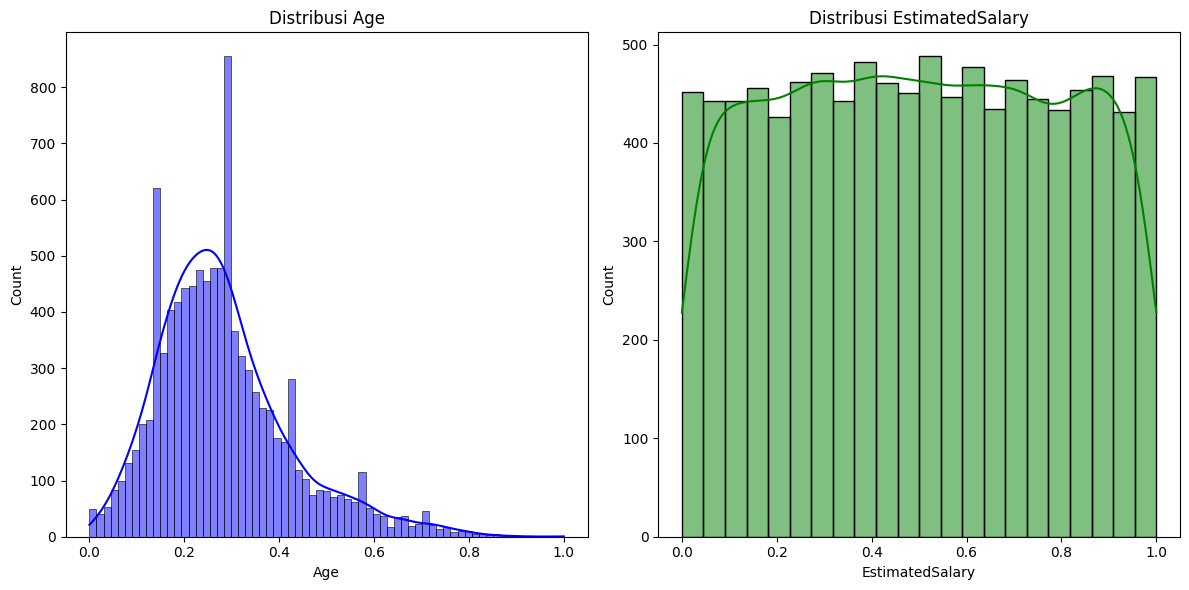

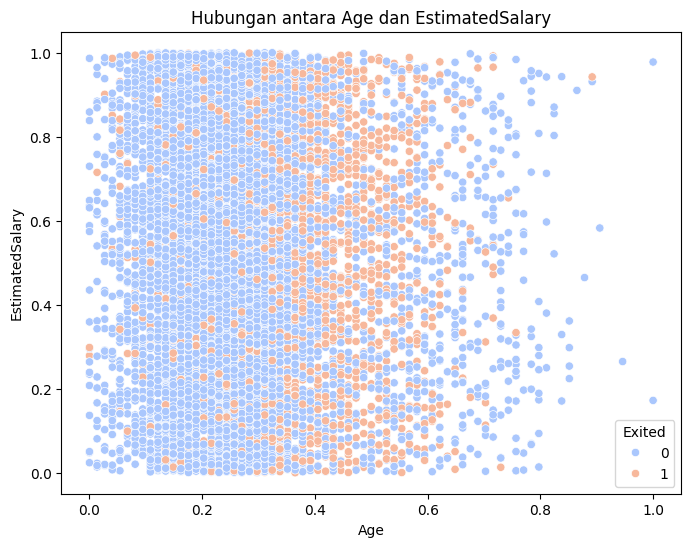

In [9]:

# Plot distribusi untuk Age dan EstimatedSalary
plt.figure(figsize=(12, 6))

# Distribusi Age
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['Age'], kde=True, color='blue')
plt.title('Distribusi Age')

# Distribusi EstimatedSalary
plt.subplot(1, 2, 2)
sns.histplot(data_cleaned['EstimatedSalary'], kde=True, color='green')
plt.title('Distribusi EstimatedSalary')

plt.tight_layout()
plt.show()

# Plot hubungan antara Age dan EstimatedSalary
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_cleaned['Age'], y=data_cleaned['EstimatedSalary'], hue=data_cleaned['Exited'], palette='coolwarm')
plt.title('Hubungan antara Age dan EstimatedSalary')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()


# 5. Simulasikan prediksi potensi churn menggunakan pendekatan klasifikasi sederhana.


Accuracy: 0.817


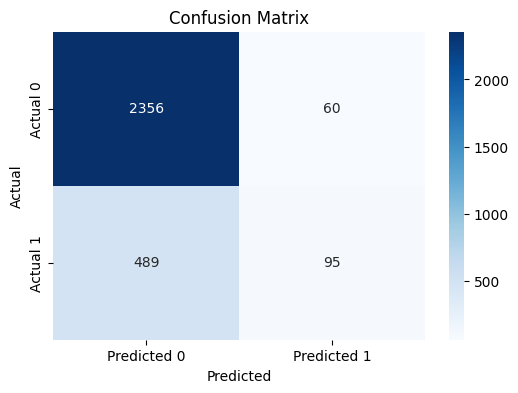


Classification Report:
              precision    recall  f1-score   support
0              0.828120  0.975166  0.895647  2416.000
1              0.612903  0.162671  0.257104   584.000
accuracy       0.817000  0.817000  0.817000     0.817
macro avg      0.720511  0.568918  0.576376  3000.000
weighted avg   0.786224  0.817000  0.771344  3000.000


(0.817,
 array([[2356,   60],
        [ 489,   95]]),
               precision    recall  f1-score   support
 0              0.828120  0.975166  0.895647  2416.000
 1              0.612903  0.162671  0.257104   584.000
 accuracy       0.817000  0.817000  0.817000     0.817
 macro avg      0.720511  0.568918  0.576376  3000.000
 weighted avg   0.786224  0.817000  0.771344  3000.000)

In [14]:

# Memisahkan fitur dan target
X = data_cleaned.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)  # Drop kolom yang tidak relevan
y = data_cleaned['Exited']

# Split data menjadi training dan testing set (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membuat model Logistic Regression (pendekatan klasifikasi sederhana)
model = LogisticRegression(max_iter=1000)  # Menambahkan max_iter untuk memastikan konvergensi
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report_str = classification_report(y_test, y_pred)

# Menampilkan accuracy
print(f"Accuracy: {accuracy:.3f}")


# Visualisasi Confusion Matrix dengan heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Menampilkan Classification Report sebagai DataFrame
class_report_dict = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report_dict).transpose()

# Menampilkan Classification Report
print("\nClassification Report:")
print(class_report_df)

accuracy, conf_matrix, class_report_df